In [1]:
import numpy as np

In [2]:
alphabet = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4, 
    '5' : 5, 
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9, 
    '+' : 10,
    '-' : 11,
    ' ' : 12
}

#Making input point A

In [3]:
def make_data():
  #making input (20000x3)

  inp = []

  for i in range(100):
    for x in ['+', '-']:
      for j in range(100):
        itr = []
        itr.append(str(i))
        itr.append(x)
        itr.append(str(j))
        inp.append(itr)

  query = []

  for i in range(len(inp)):
    st = ''
    for x in inp[i]:
      # print(x)  
      st+=x
    query.append(st)

  for i in range(len(query)):
    if len(query[i]) < 5:
      query[i]+=" "*(5 - len(query[i]))

  # query = np.array(query)


  ans = []
  for i in query:
    if eval(i) >= 0:
      st = '+' + str(eval(i))
      ans.append(st)
    else:
      ans.append(str(eval(i)))
  
  
  for i in range(len(ans)):
    if len(ans[i]) < 4:
      ans[i]+=" "*(4 - len(ans[i]))

  X = np.zeros((len(query), 5))
  Y = np.zeros((len(query), 4)) 

  for i in range(len(query)):
    index = 0
    for c in query[i]:
      X[i, index] = int(alphabet[c])
      index+=1


  for i in range(len(ans)):
    index = 0
    for c in ans[i]:
      Y[i, index] = int(alphabet[c])
      index+=1  

  reverse_X = np.fliplr(X)
  reverse_Y = np.fliplr(Y)

  return X,Y

In [4]:
X, Y = make_data()

In [5]:
X

array([[ 0., 10.,  0., 12., 12.],
       [ 0., 10.,  1., 12., 12.],
       [ 0., 10.,  2., 12., 12.],
       ...,
       [ 9.,  9., 11.,  9.,  7.],
       [ 9.,  9., 11.,  9.,  8.],
       [ 9.,  9., 11.,  9.,  9.]])

In [6]:
Y

array([[10.,  0., 12., 12.],
       [10.,  1., 12., 12.],
       [10.,  2., 12., 12.],
       ...,
       [10.,  2., 12., 12.],
       [10.,  1., 12., 12.],
       [10.,  0., 12., 12.]])

In [7]:
reverse_X = np.fliplr(X)
reverse_Y = np.fliplr(Y)

In [8]:
reverse_X

array([[12., 12.,  0., 10.,  0.],
       [12., 12.,  1., 10.,  0.],
       [12., 12.,  2., 10.,  0.],
       ...,
       [ 7.,  9., 11.,  9.,  9.],
       [ 8.,  9., 11.,  9.,  9.],
       [ 9.,  9., 11.,  9.,  9.]])

In [9]:
reverse_Y

array([[12., 12.,  0., 10.],
       [12., 12.,  1., 10.],
       [12., 12.,  2., 10.],
       ...,
       [12., 12.,  2., 10.],
       [12., 12.,  1., 10.],
       [12., 12.,  0., 10.]])

In [10]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

one_hot_X = to_categorical(X, num_classes=13)
one_hot_Y = to_categorical(Y, num_classes=13)

one_hot_reverse_X = to_categorical(reverse_X, num_classes=13)
one_hot_reverse_Y = to_categorical(reverse_Y, num_classes=13)

In [11]:
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.7
ratio_val = 0.15
ratio_test = 0.15

# Produces test split.
x_train, x_test, y_train, y_test = train_test_split(one_hot_X, one_hot_Y, test_size=ratio_test, shuffle=True)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=ratio_val_adjusted)

In [12]:
x_train.shape

(14000, 5, 13)

In [13]:
x_test.shape

(3000, 5, 13)

In [14]:
x_val.shape

(3000, 5, 13)

In [15]:
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.7
ratio_val = 0.15
ratio_test = 0.15

# Produces test split.
reverse_x_train, reverse_x_test, reverse_y_train, reverse_y_test = train_test_split(one_hot_reverse_X, one_hot_reverse_Y, test_size=ratio_test, shuffle=True)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
reverse_x_train, reverse_x_val, reverse_y_train, reverse_y_val = train_test_split(reverse_x_train, reverse_y_train, test_size=ratio_val_adjusted)

In [16]:
reverse_x_train.shape

(14000, 5, 13)

In [17]:
reverse_x_test.shape

(3000, 5, 13)

In [18]:
reverse_x_val.shape

(3000, 5, 13)

# Point C

*   The LSTM network takes a 2D array as input.

*   With return_sequence=False, only the last cell will emit an output.


*   The RepeatVector(4), duplicates the output of the LSTM layer so that the next layer can have 2D array as input.

*   And if the next layer after LSTM is dense then, no RepeatVector is required, as a Dense layer expects a vector as an input.

*   Layer 1, LSTM(128), reads input data and outputs 128 features with shape (1, 128) because return_sequences=False.

*   Layer 2, LSTM(128), takes 4x128 as input.

*   Layer 3, Dense(13), gives an output of shape 4x13.

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


model = Sequential()
model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
model.add(RepeatVector(4))
model.add(LSTM(128, return_sequences=True))

model.add(Dense(13, activation="softmax"))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               72704     
                                                                 
 repeat_vector (RepeatVector  (None, 4, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            131584    
                                                                 
 dense (Dense)               (None, 4, 13)             1677      
                                                                 
Total params: 205,965
Trainable params: 205,965
Non-trainable params: 0
_________________________________________________________________


In [20]:
# normal_model = build_model()

result = model.fit(x_train, y_train, validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32
)

eval_result = model.evaluate(x_test,y_test)
print("Loss: %.5f \nAccuracy: %.5f" % (eval_result[0], eval_result[1]))

Epoch 1/50
438/438 [==============================] - 15s 24ms/step - loss: 1.4758 - accuracy: 0.4866 - val_loss: 1.2536 - val_accuracy: 0.5353
Epoch 2/50
438/438 [==============================] - 9s 21ms/step - loss: 1.1577 - accuracy: 0.5787 - val_loss: 1.0850 - val_accuracy: 0.5971
Epoch 3/50
438/438 [==============================] - 10s 22ms/step - loss: 1.0267 - accuracy: 0.6290 - val_loss: 0.9722 - val_accuracy: 0.6472
Epoch 4/50
438/438 [==============================] - 9s 21ms/step - loss: 0.9573 - accuracy: 0.6533 - val_loss: 0.9182 - val_accuracy: 0.6757
Epoch 5/50
438/438 [==============================] - 10s 22ms/step - loss: 0.9115 - accuracy: 0.6718 - val_loss: 0.9013 - val_accuracy: 0.6798
Epoch 6/50
438/438 [==============================] - 10s 22ms/step - loss: 0.8643 - accuracy: 0.6890 - val_loss: 0.8726 - val_accuracy: 0.6739
Epoch 7/50
438/438 [==============================] - 9s 22ms/step - loss: 0.8201 - accuracy: 0.7015 - val_loss: 0.8011 - val_accuracy: 0.

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


rev_model = Sequential()
rev_model.add(LSTM(128, input_shape=(5, 13), return_sequences=False))
rev_model.add(RepeatVector(4))
rev_model.add(LSTM(128, return_sequences=True))

rev_model.add(Dense(13, activation="softmax"))

rev_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [22]:
# normal_model = build_model()

rev_result = rev_model.fit(reverse_x_train, reverse_y_train, validation_data=(reverse_x_val, reverse_y_val),
    epochs=50,
    batch_size=32
)

rev_eval_result = model.evaluate(reverse_x_test,reverse_y_test)
# print("Loss: %.5f \nAccuracy: %.5f" % (rev_eval_result[0], rev_eval_result [1]))

Epoch 1/50
438/438 [==============================] - 15s 25ms/step - loss: 1.4446 - accuracy: 0.4944 - val_loss: 1.2406 - val_accuracy: 0.5483
Epoch 2/50
438/438 [==============================] - 9s 21ms/step - loss: 1.1570 - accuracy: 0.5768 - val_loss: 1.0635 - val_accuracy: 0.6088
Epoch 3/50
438/438 [==============================] - 9s 21ms/step - loss: 0.9958 - accuracy: 0.6432 - val_loss: 0.9511 - val_accuracy: 0.6476
Epoch 4/50
438/438 [==============================] - 9s 21ms/step - loss: 0.8941 - accuracy: 0.6840 - val_loss: 0.8330 - val_accuracy: 0.7120
Epoch 5/50
438/438 [==============================] - 9s 21ms/step - loss: 0.8273 - accuracy: 0.7001 - val_loss: 0.7802 - val_accuracy: 0.7278
Epoch 6/50
438/438 [==============================] - 9s 21ms/step - loss: 0.7611 - accuracy: 0.7256 - val_loss: 0.7382 - val_accuracy: 0.7272
Epoch 7/50
438/438 [==============================] - 10s 24ms/step - loss: 0.7237 - accuracy: 0.7339 - val_loss: 0.7775 - val_accuracy: 0.71

# Part f

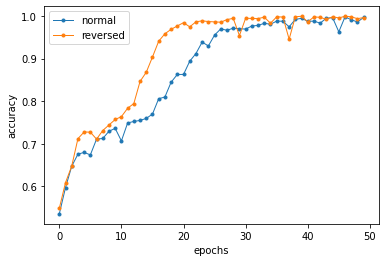

In [25]:
import matplotlib.pyplot as plt

model_accuracy = result.history['val_accuracy']
rev_model_accuracy = rev_result.history['val_accuracy']
x_len = min(len(model_accuracy), len(rev_model_accuracy))
epochs = range(x_len)

plt.plot(epochs, model_accuracy, linestyle = '-',  label = 'normal', marker ='.', linewidth=1)
plt.plot(epochs,rev_model_accuracy, linestyle = '-',  label = 'reversed', marker ='.', linewidth=1)
plt.legend(loc="best")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()